# Phase 2 - Signal Preprocessing (Version 2):
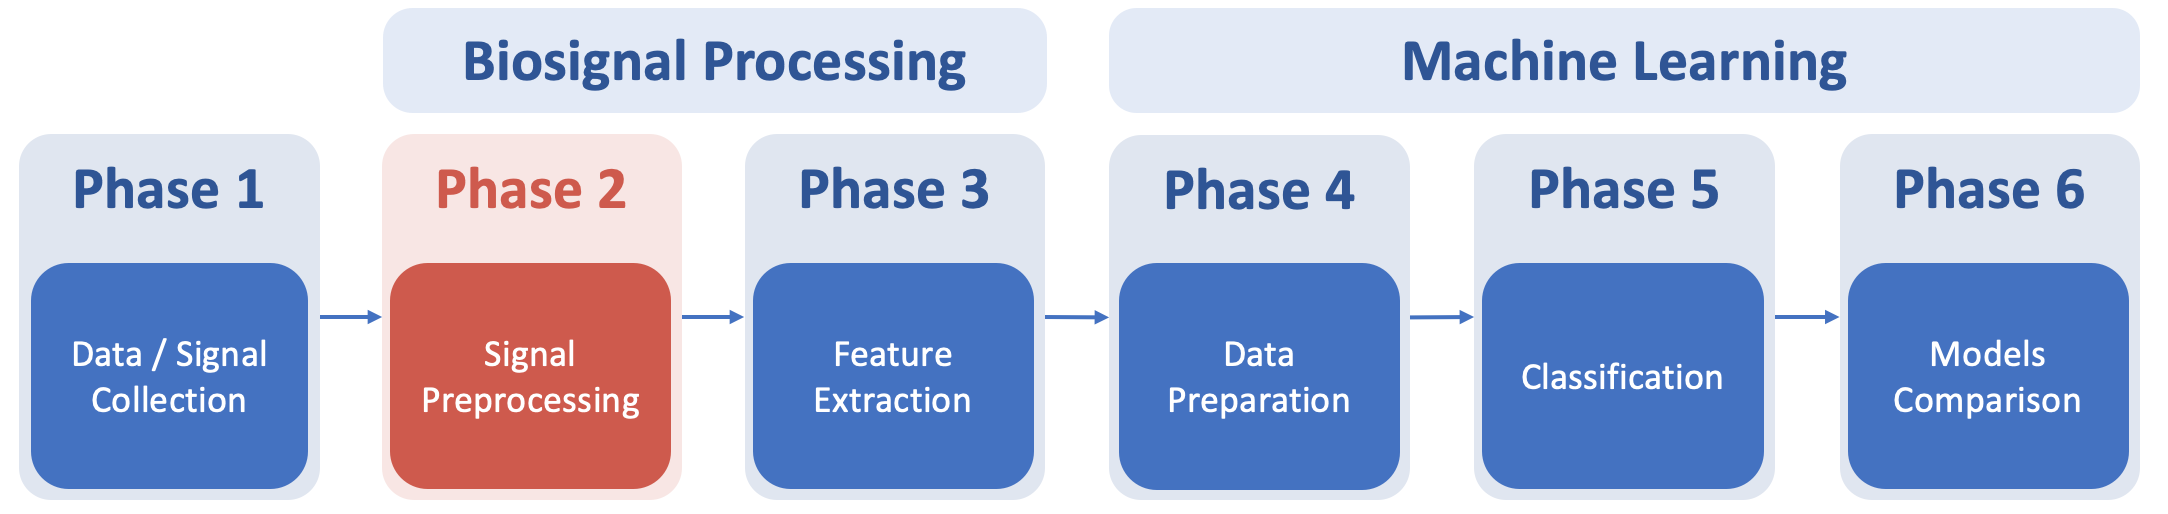
### Introduction: 
Different signal preprocessing methods can be applied on Phonocardiogram signals. In this phase, methods such as empirical Mode Decomposition, Wavelet-Denoising and Digital-Filters are applied seperately and in a combination. 

### Objective:
1. Extracting the signal using Scipy, in which the signal is not normalized.
2. Comparing different signal preprocessing methods on normal and one abnormal signal without normalization.
3. Choosing one or more methods to be applied on all the dataset and moving to Phase 3 (Feature Extraction).
4. Slicing the signals to increase the dataset by slicing all signals to 5000 samples with respect to its class.

### Notes:
- In the complete notebook, a signle of normal and abnormal signal are used for comparision.
- All the functions and variables, which are used in this file, are imported from helpers.py file from the signal_processing package in the same repository.
- audio_index[0] is a normal PCG Signal.
- audio_index[6] is an abnormal PCG Signal.

In [1]:
# Importing libraries:
import pandas as pd
from glob import glob

# Importing signal_preprocessing package:
import importlib
import helpers
importlib.reload(helpers)

# Importing constant.py from the main project directory:
import sys
sys.path.insert(0, '/Users/mohammedlajam/Documents/GitHub/pcg-classification')
import constants as c

In [2]:
# 1. Function to load all the paths of the audio files in one list:
def _create_signal_paths():
    """Function to create a list of all the Audio paths and it References."""
    # Loading all the paths of the audio files in one list:
    directories = ['a', 'b', 'c', 'd', 'e', 'f']
    audio_files = [glob(f'{c.DATASET_PATH}/training-{directory}/*.wav') for directory in directories]
    audio_files = [item for elem in audio_files for item in elem]
    audio_files = sorted(audio_files)

    # Loading the references:
    references = pd.concat([pd.read_csv(f'{c.DATASET_PATH}/training-{directory}/REFERENCE.csv', header=None) for directory in directories], ignore_index=True)
    references.columns = ['signal_id', 'class']
    return audio_files, references

In [3]:
AUDIO_FILES, REFERENCES = _create_signal_paths()

## 1. Signal Exploration:
### 1.1. Displaying the Audio recording:

In [4]:
# Normal Signal:
helpers.display_audio(file_path=AUDIO_FILES, audio_index=0)

In [5]:
# Abnormal Signal:
helpers.display_audio(file_path=AUDIO_FILES, audio_index=6)

### 1.2. Time-Domain:

In [6]:
# Extracting the Signal:
# Normal Signal:
NORMAL_SIGNAL, _ = helpers.extract_signal(file_path=AUDIO_FILES, audio_index=0, sr=c.SAMPLING_RATE, normalization=False)
# ABnormal Signal:
ABNORMAL_SIGNAL, _ = helpers.extract_signal(file_path=AUDIO_FILES, audio_index=6, sr=c.SAMPLING_RATE, normalization=False)

NORMAL_SIGNAL_EXPLORATION = helpers.SignalExploration(audio_signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE)
ABNORMAL_SIGNAL_EXPLORATION = helpers.SignalExploration(audio_signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE)

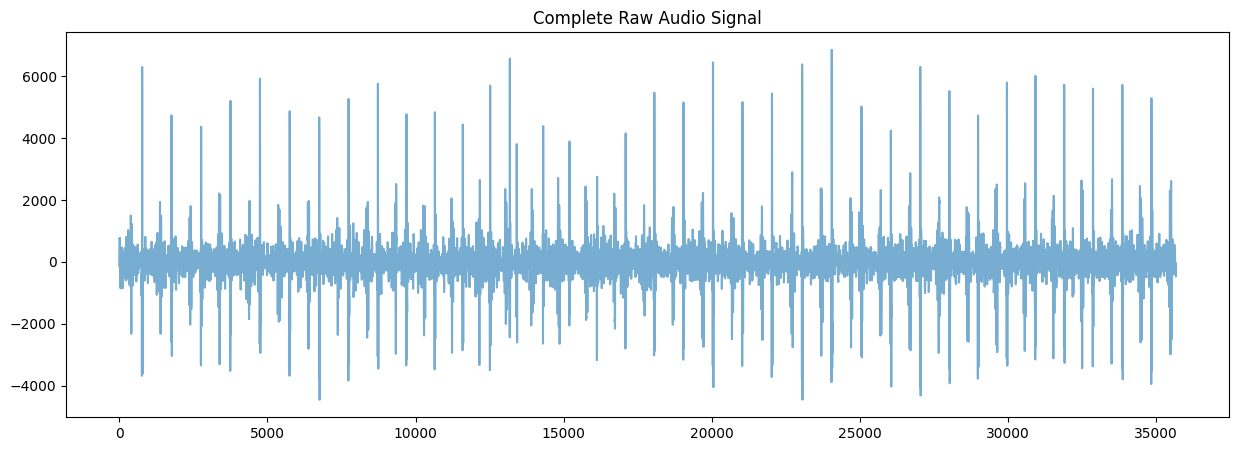

In [7]:
# Normal Signal:
NORMAL_SIGNAL_EXPLORATION.plot_signal()

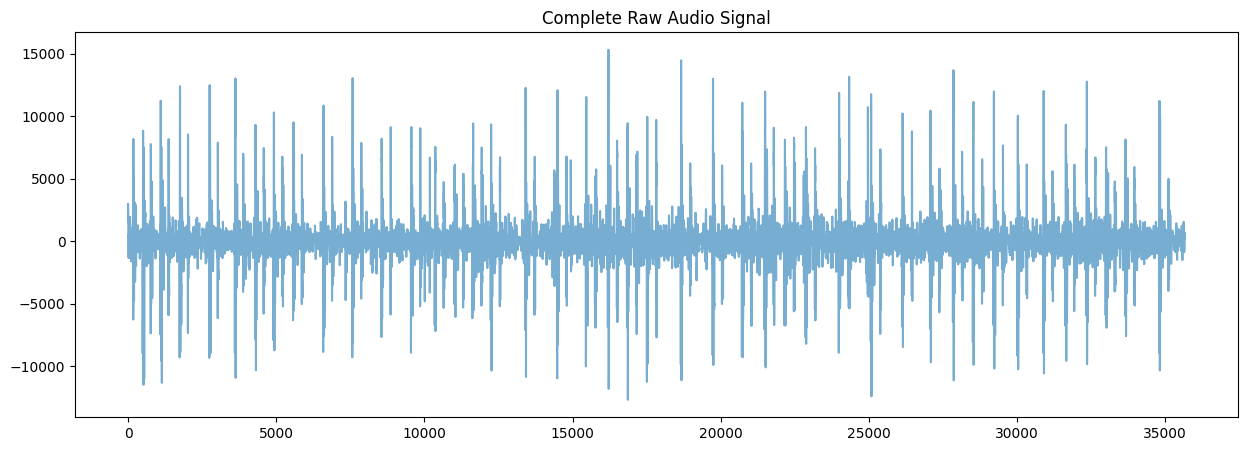

In [8]:
# Abnormal Signal:
ABNORMAL_SIGNAL_EXPLORATION.plot_signal()

### 1.3. Frequency-Domain (Spectrum):

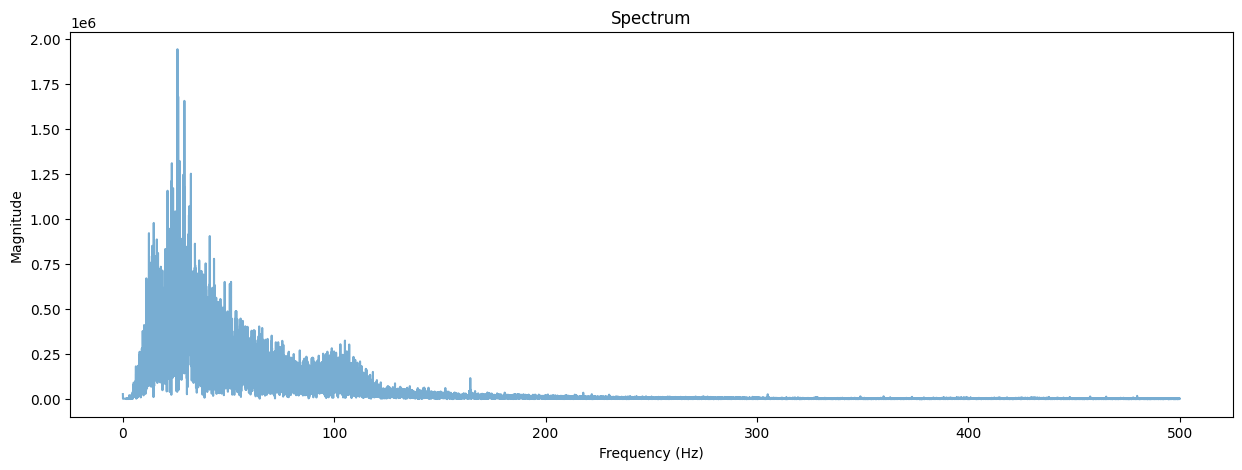

In [9]:
# Normal Signal:
NORMAL_SIGNAL_EXPLORATION.plot_spectrum()

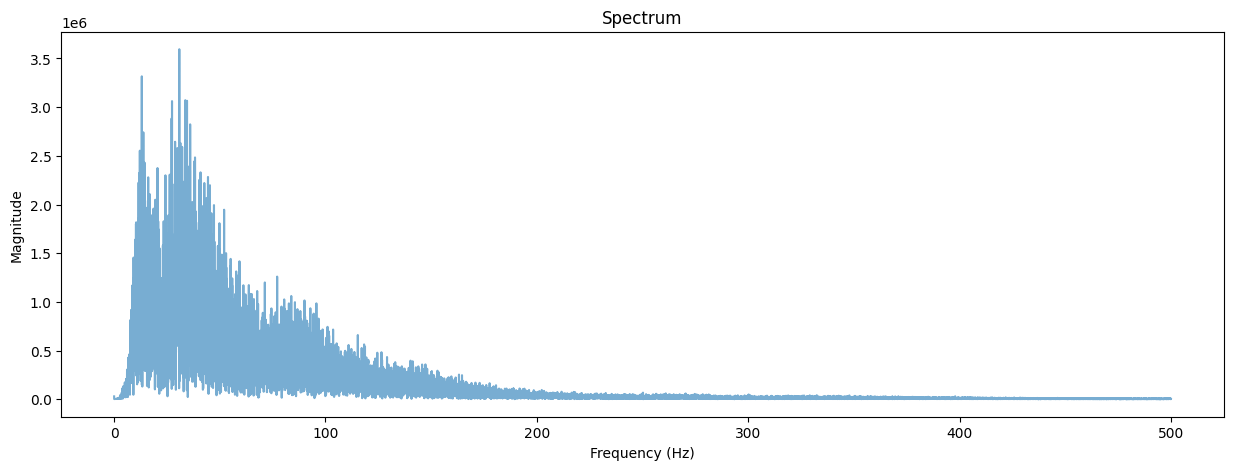

In [10]:
# Abnormal Signal:
ABNORMAL_SIGNAL_EXPLORATION.plot_spectrum()

## 2. Signal Preprocessing:

In [11]:
NORMAL_SIGNAL_PREPROCESSING = helpers.SignalPreprocessing(audio_signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE)
ABNORMAL_SIGNAL_PREPROCESSING = helpers.SignalPreprocessing(audio_signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE)

### 2.1. Empirical Mode Decomposition (EMD):
This is highly recommended signal preprocessing method for biological signal.

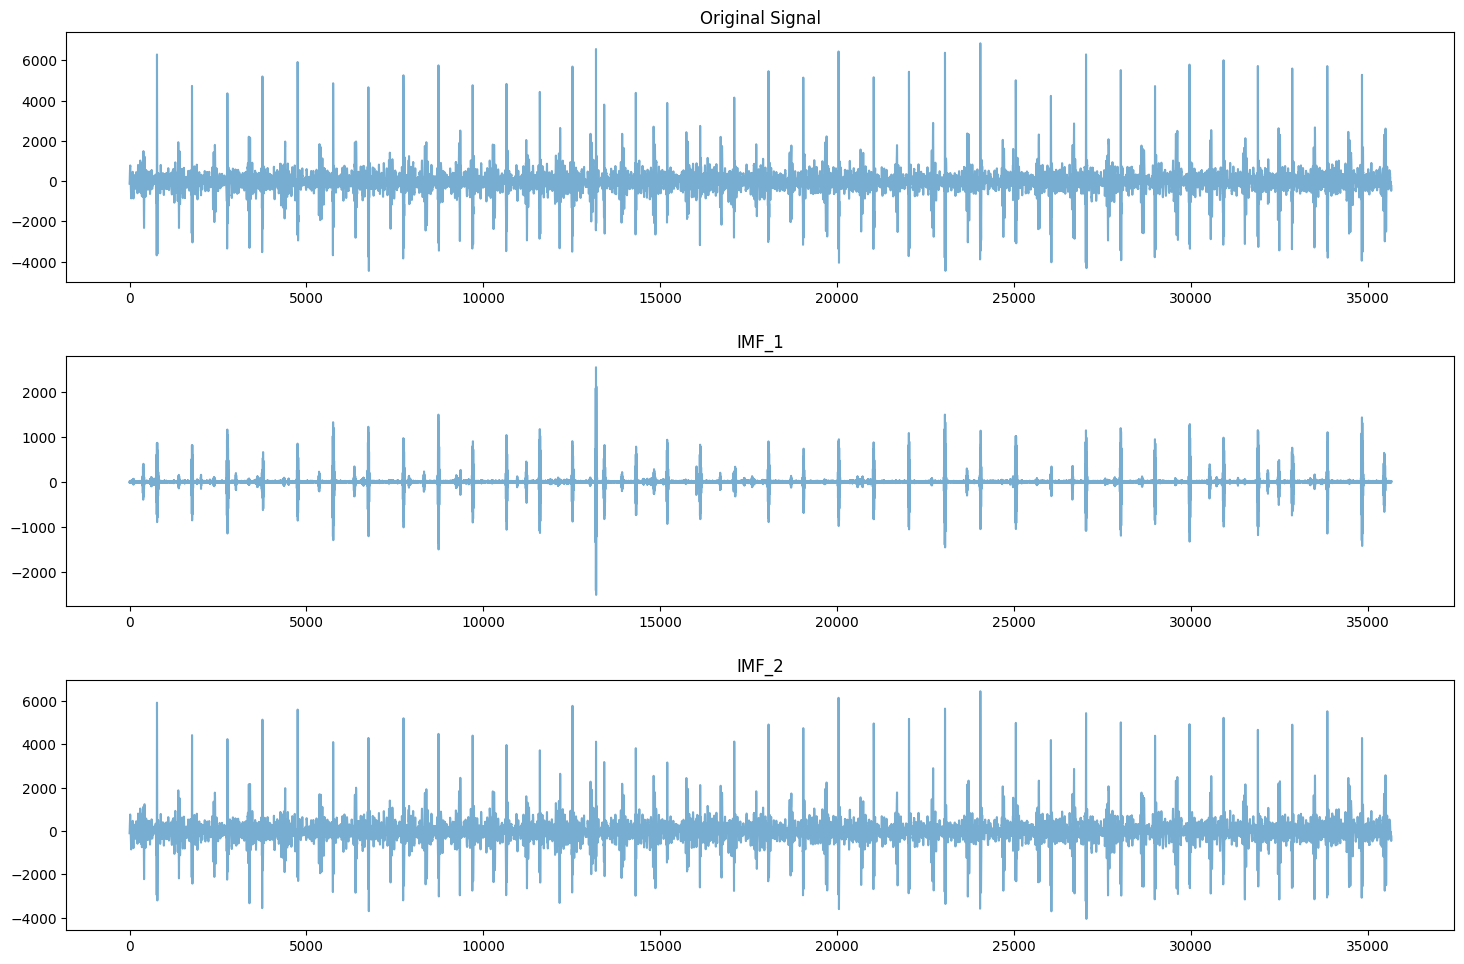

In [12]:
# Normal Signal:
NORMAL_SIGNAL_PREPROCESSING.process_emd(n_imf=c.N_IMF, plot=True)

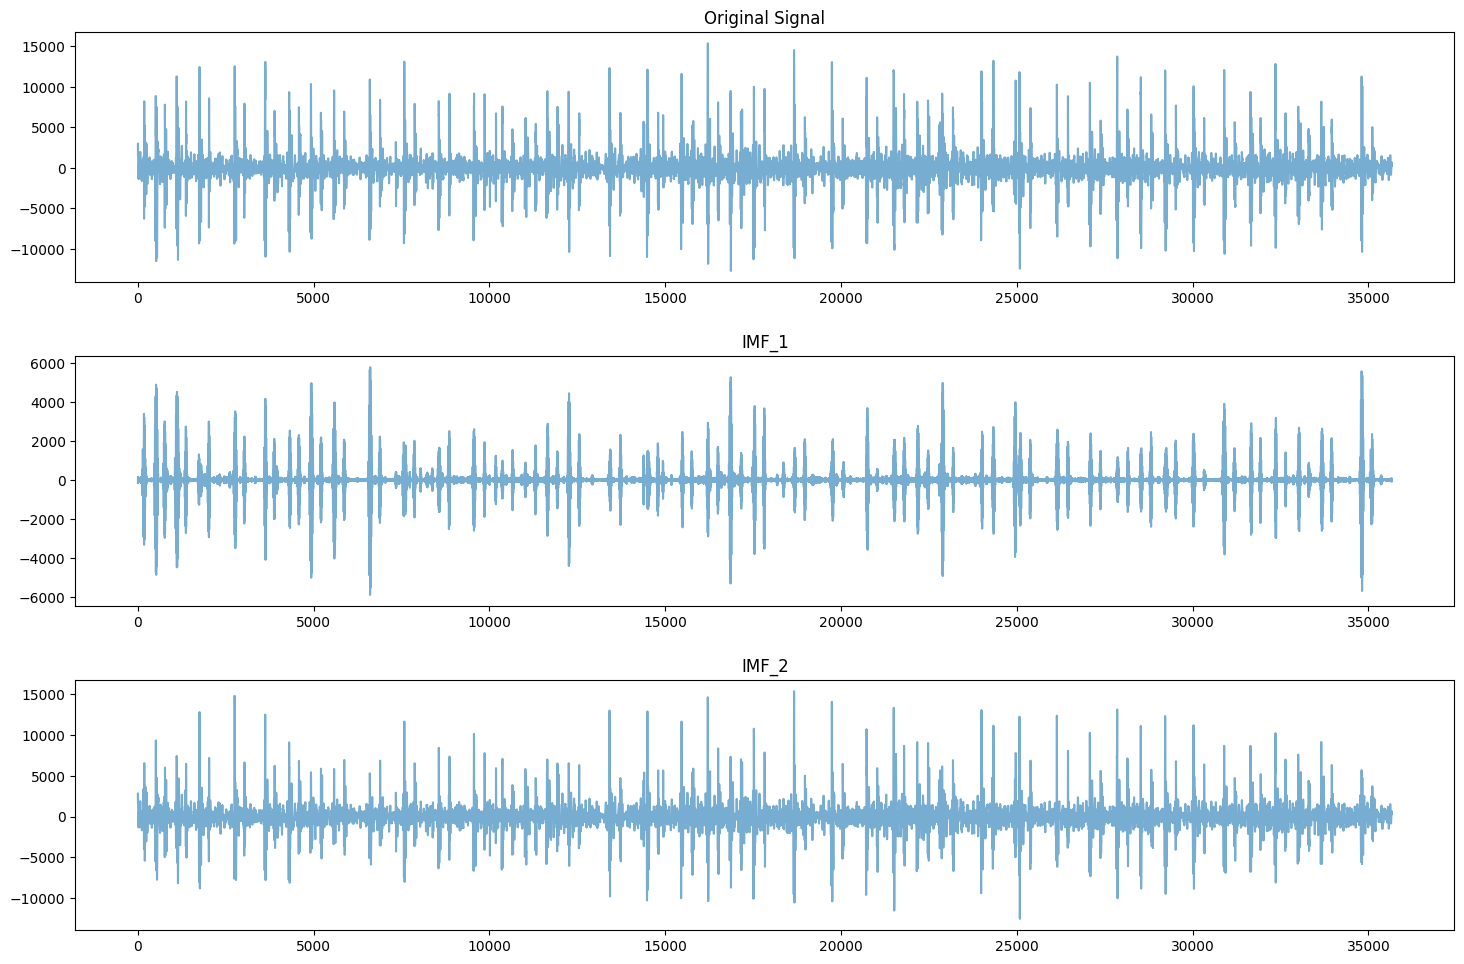

In [13]:
# Abnormal Signal:
ABNORMAL_SIGNAL_PREPROCESSING.process_emd(n_imf=c.N_IMF, plot=True)

### 2.2. Wavelet-Denoising:

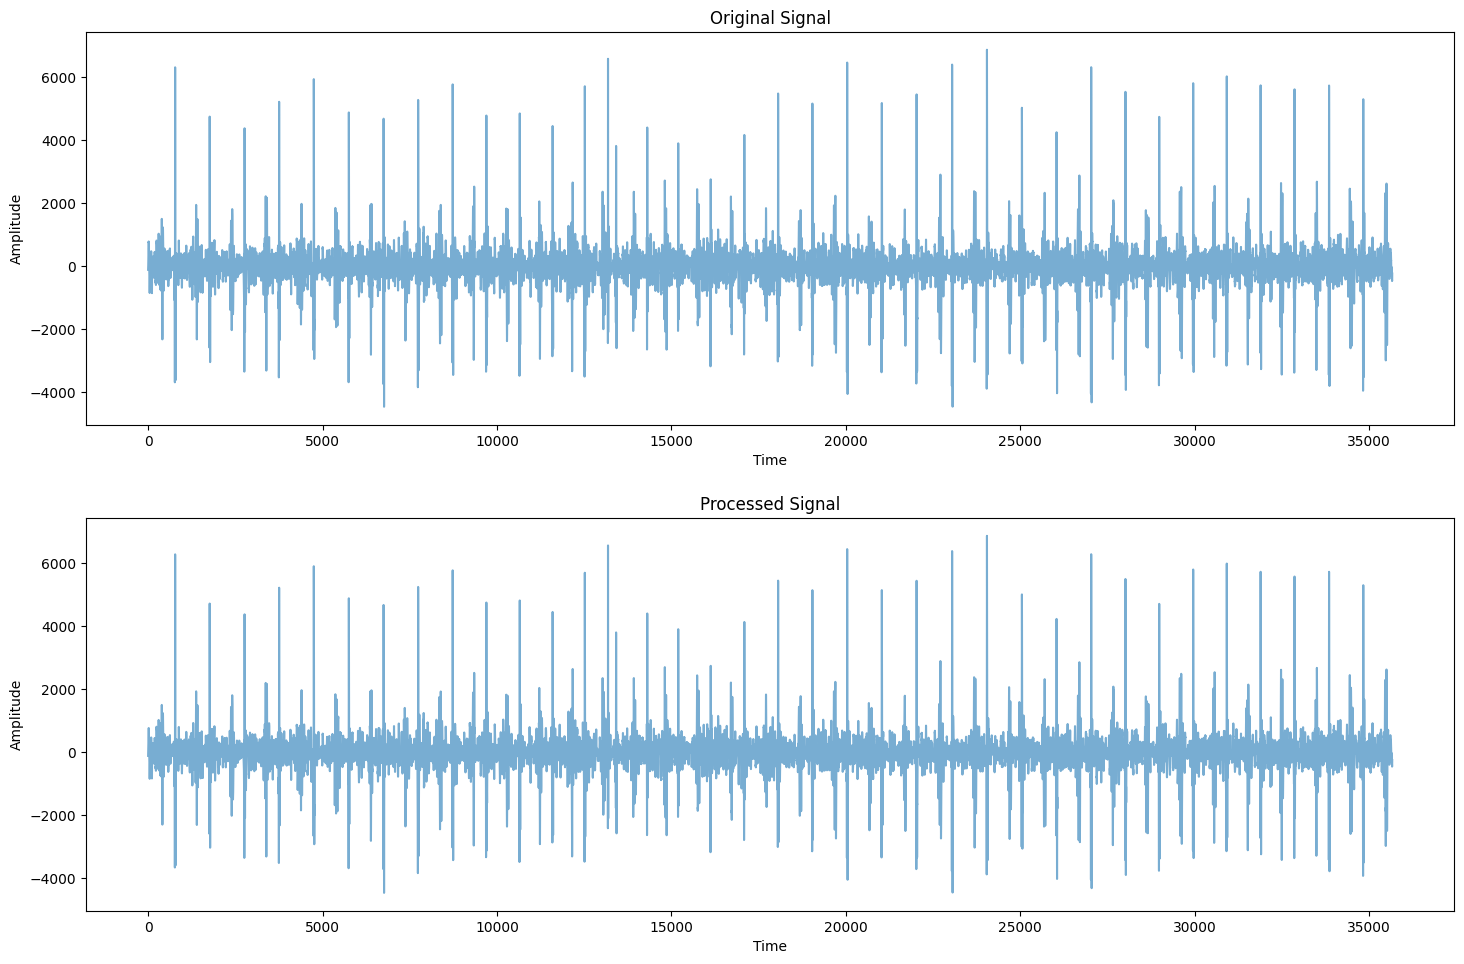

In [14]:
# Normal Signal:
NORMAL_SIGNAL_PREPROCESSING.process_wavelet_denoising(plot=True)

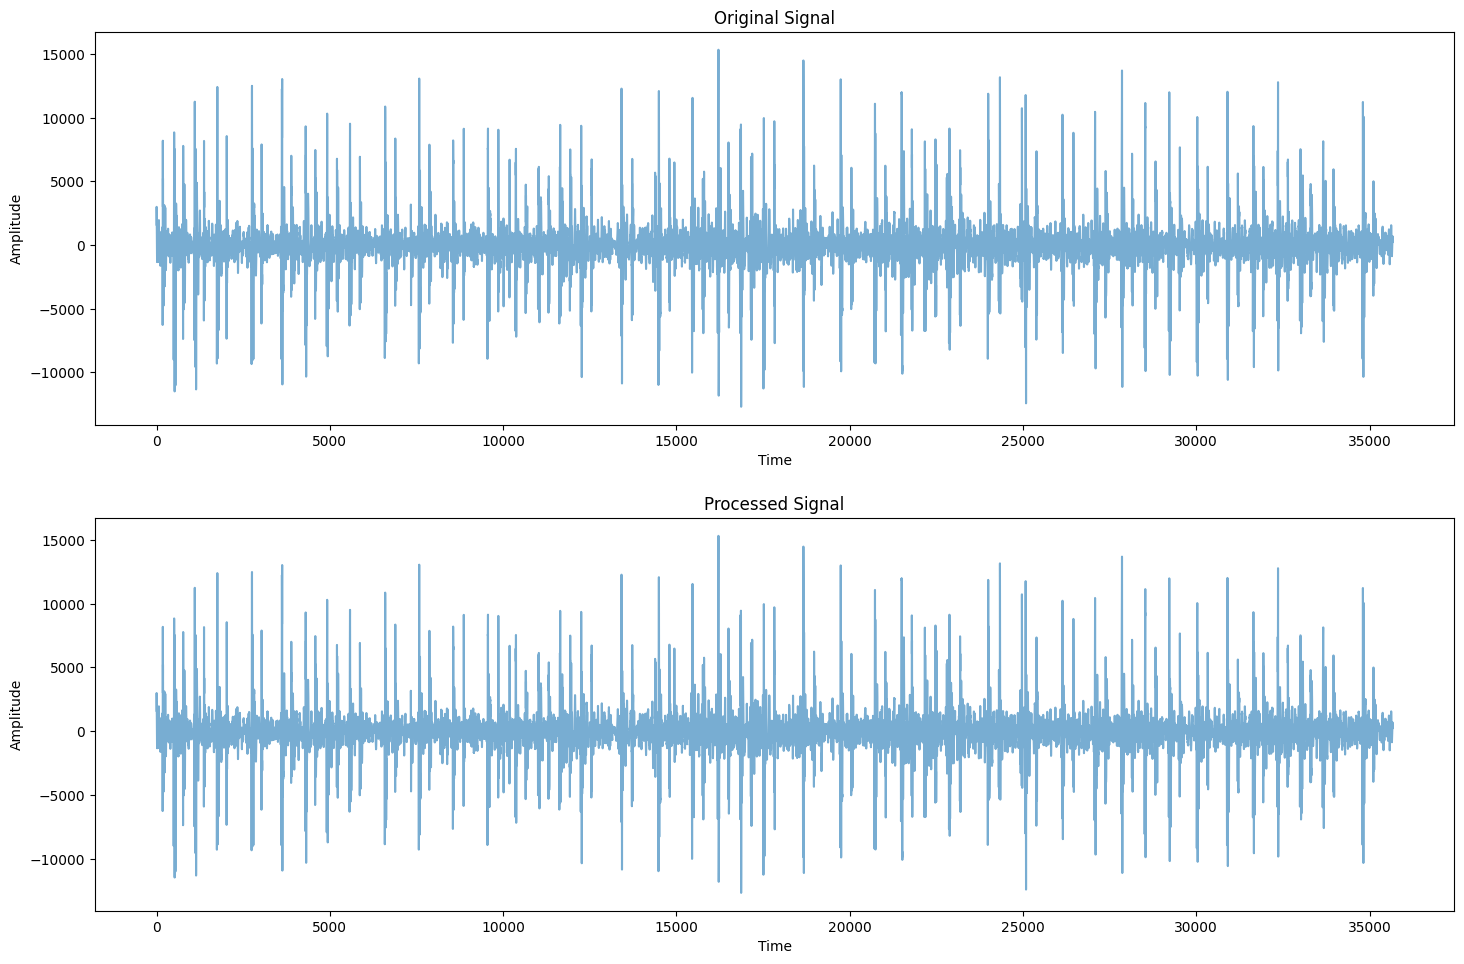

In [15]:
# Abnormal Signal:
ABNORMAL_SIGNAL_PREPROCESSING.process_wavelet_denoising(plot=True)

### 2.3. Digital-Filters:

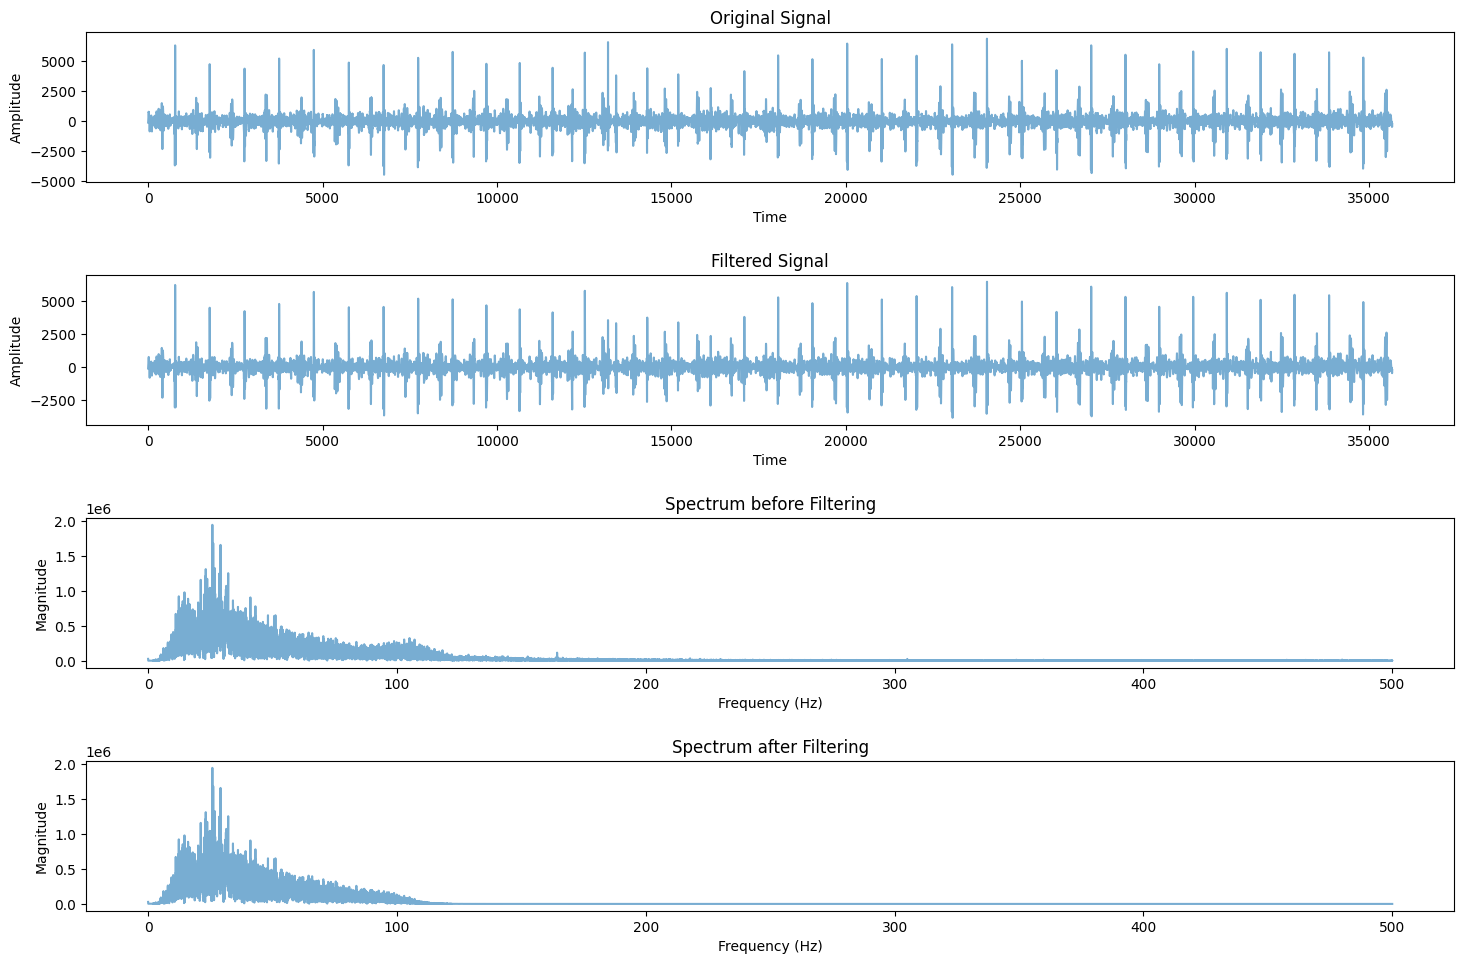

In [16]:
# Normal Signal:
NORMAL_SIGNAL_PREPROCESSING.process_digital_filter(order=c.FILTER_ORDER,
                                                   low_fc=c.LOW_FC,
                                                   high_fc=c.HIGH_FC,
                                                   plot=True)

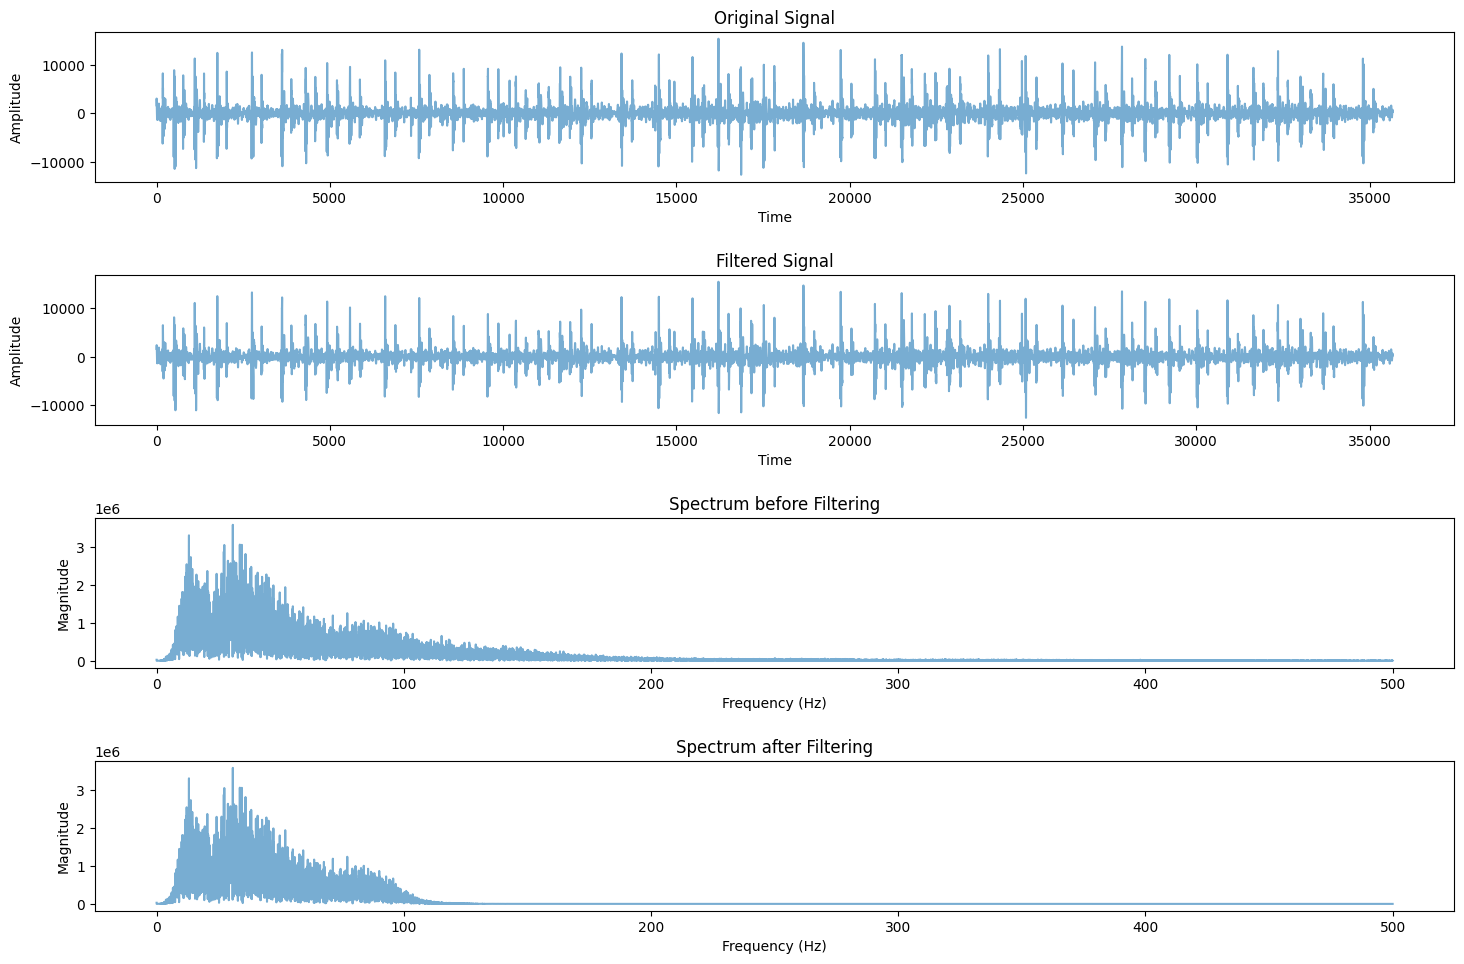

In [17]:
# Abnormal Signal:
ABNORMAL_SIGNAL_PREPROCESSING.process_digital_filter(order=c.FILTER_ORDER,
                                                     low_fc=c.LOW_FC,
                                                     high_fc=c.HIGH_FC,
                                                     plot=True)

### 2.4. EMD + Wavelet-Denoising:

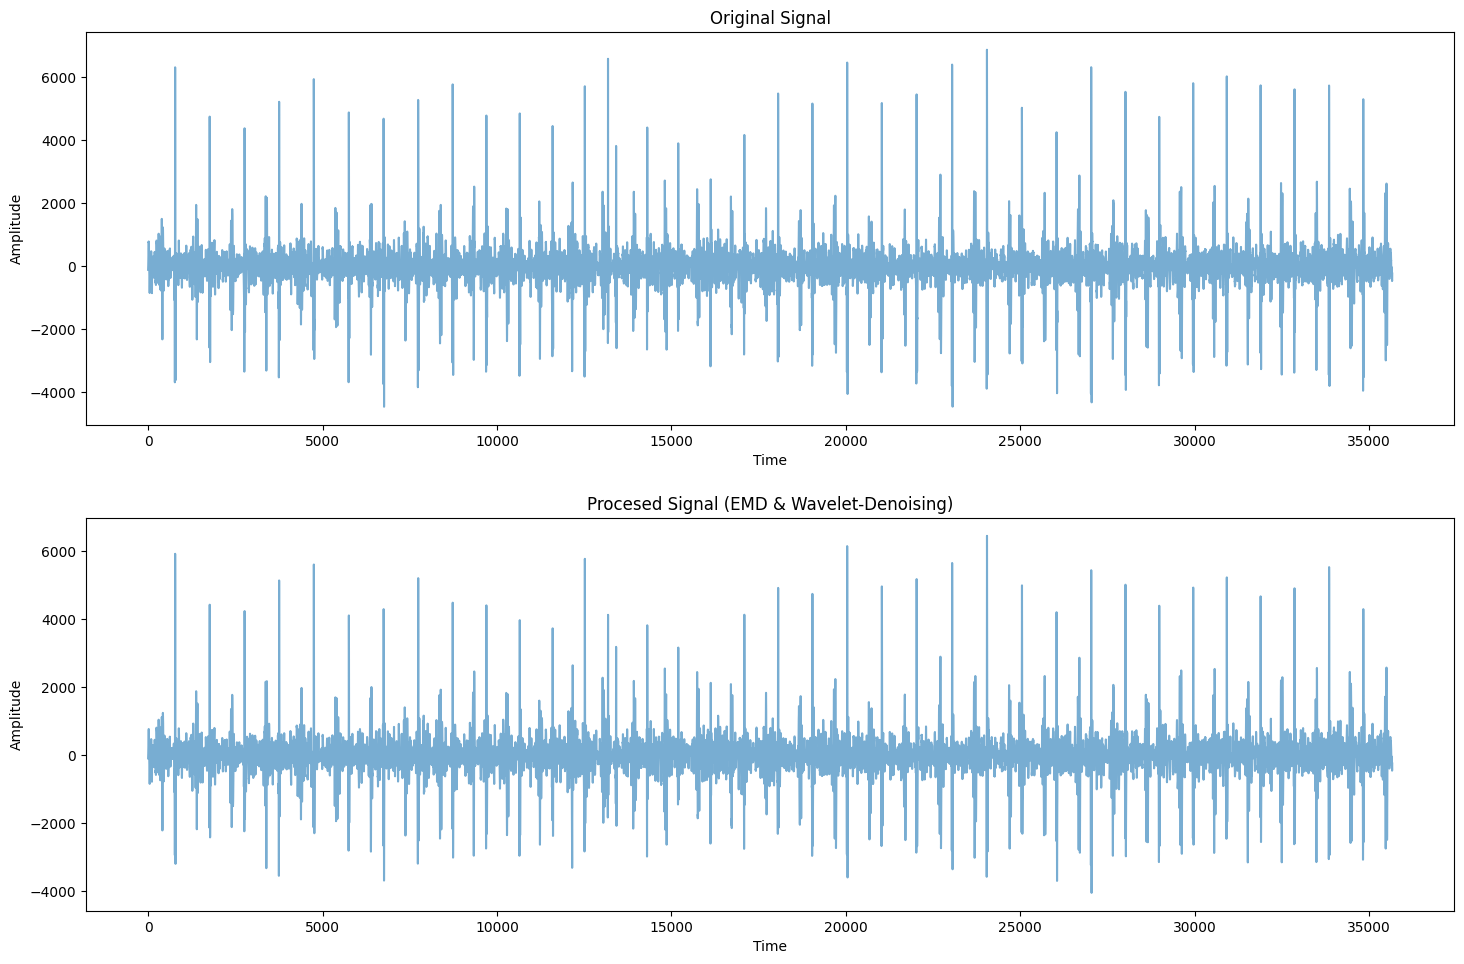

In [18]:
# Normal Signal:
NORMAL_SIGNAL_PREPROCESSING.process_emd_wl(n_imf=c.N_IMF, plot=True)

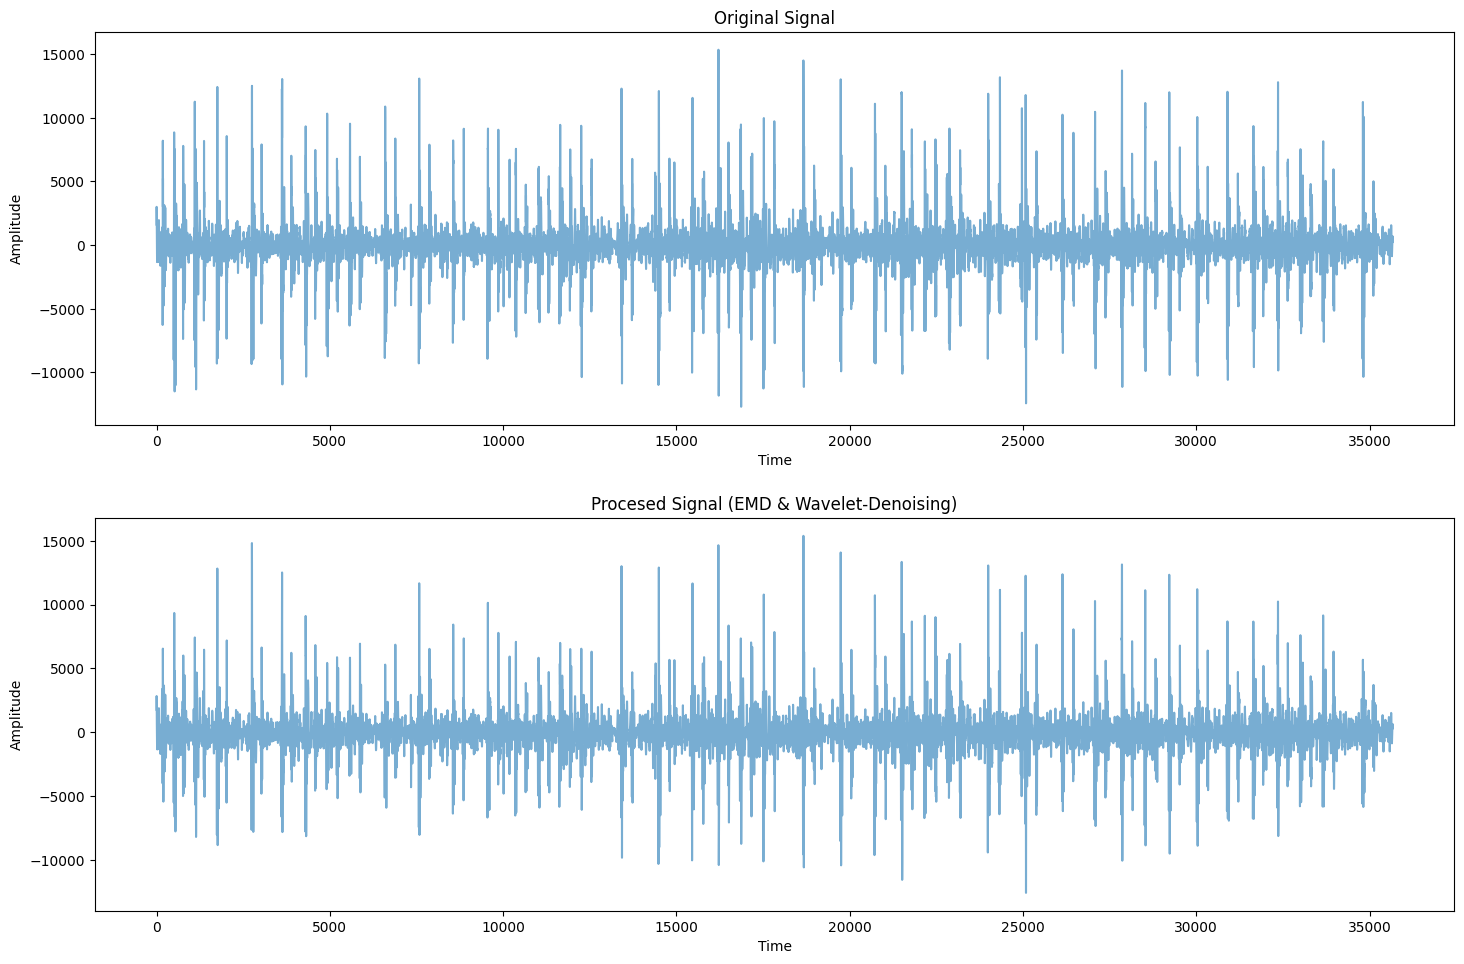

In [19]:
# Abnormal Signal:
ABNORMAL_SIGNAL_PREPROCESSING.process_emd_wl(n_imf=c.N_IMF, plot=True)

### 2.5. EMD + Digital_Filters:

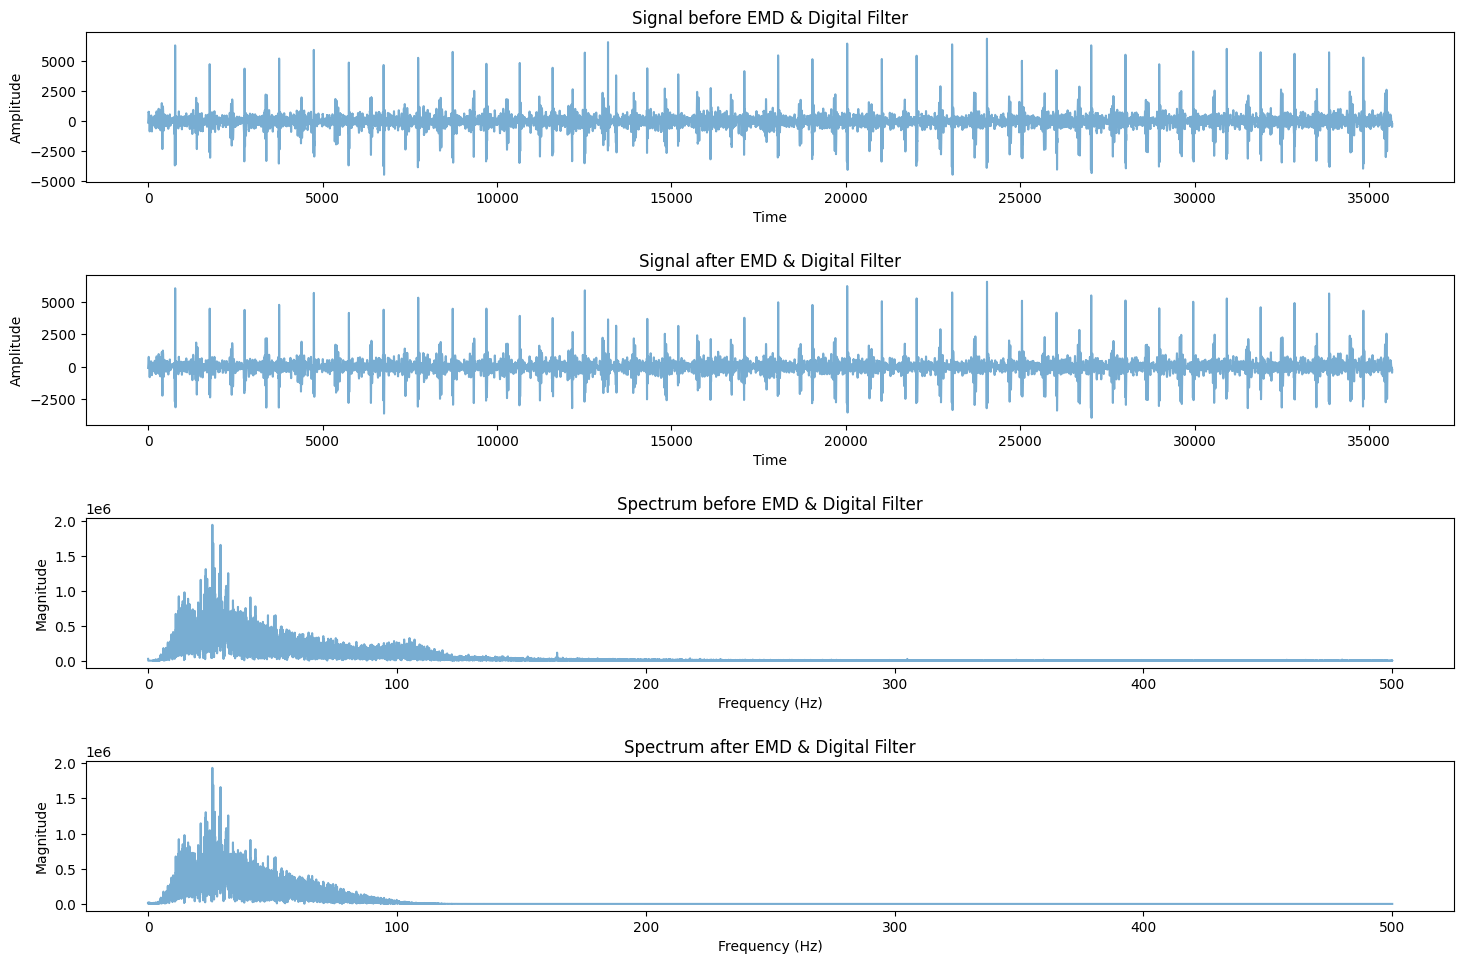

In [20]:
# Normal Signal:
NORMAL_SIGNAL_PREPROCESSING.process_emd_dfilter(n_imf=c.N_IMF,
                                                order=c.FILTER_ORDER,
                                                low_fc=c.LOW_FC,
                                                high_fc=c.HIGH_FC,
                                                plot=True)

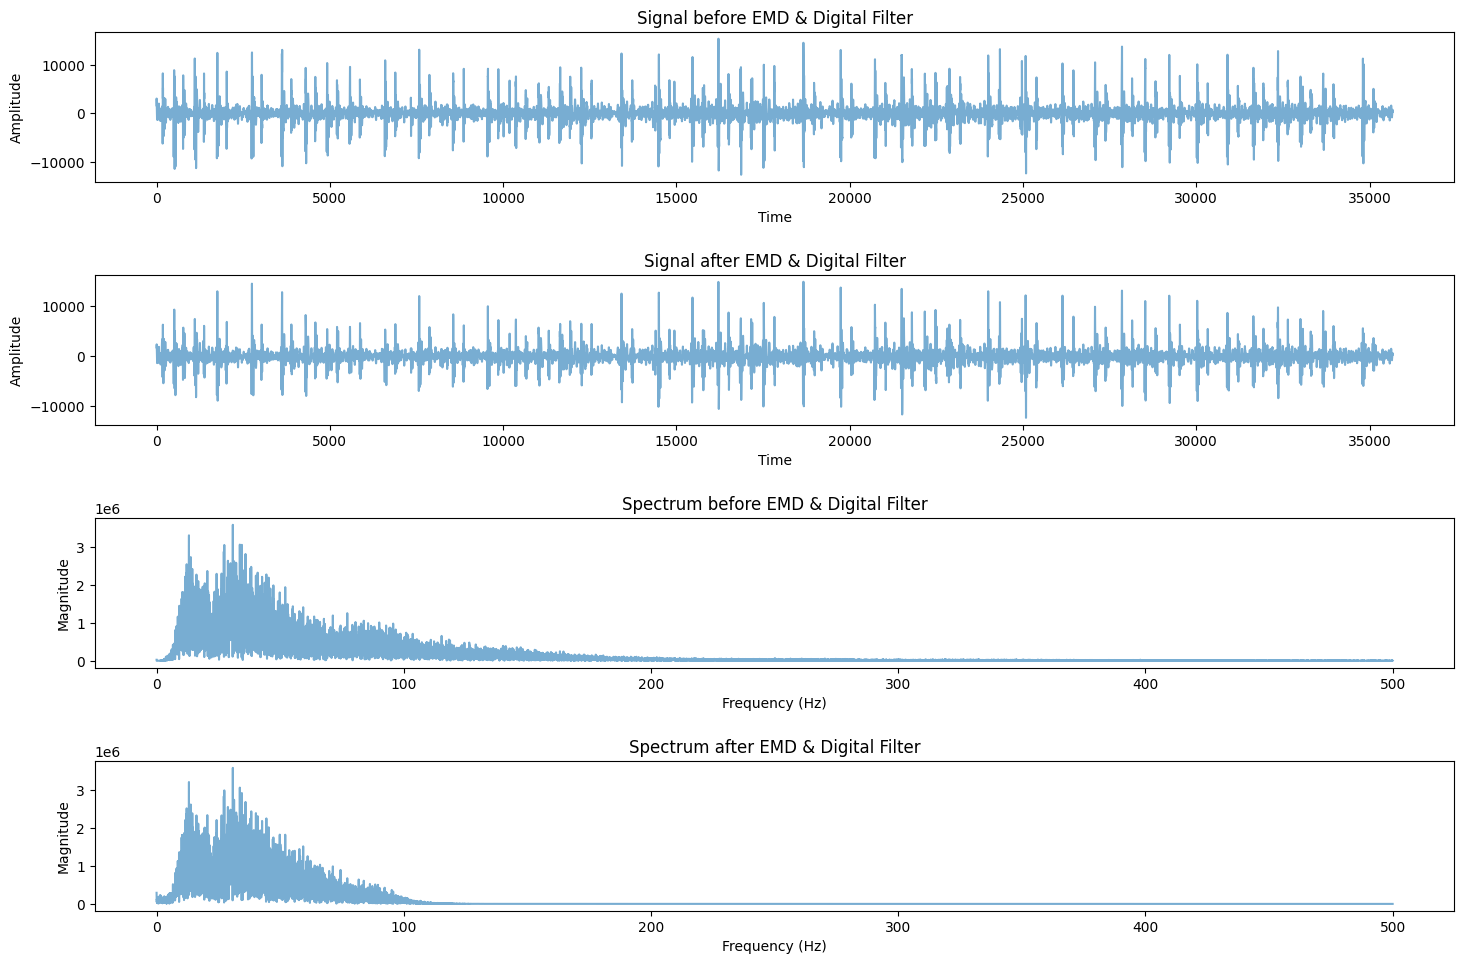

In [21]:
# Abnormal Signal:
ABNORMAL_SIGNAL_PREPROCESSING.process_emd_dfilter(n_imf=c.N_IMF,
                                                  order=c.FILTER_ORDER,
                                                  low_fc=c.LOW_FC,
                                                  high_fc=c.HIGH_FC,
                                                  plot=True)

### 2.6. EMD + Wavelet-Denoising + Digital_Filters:

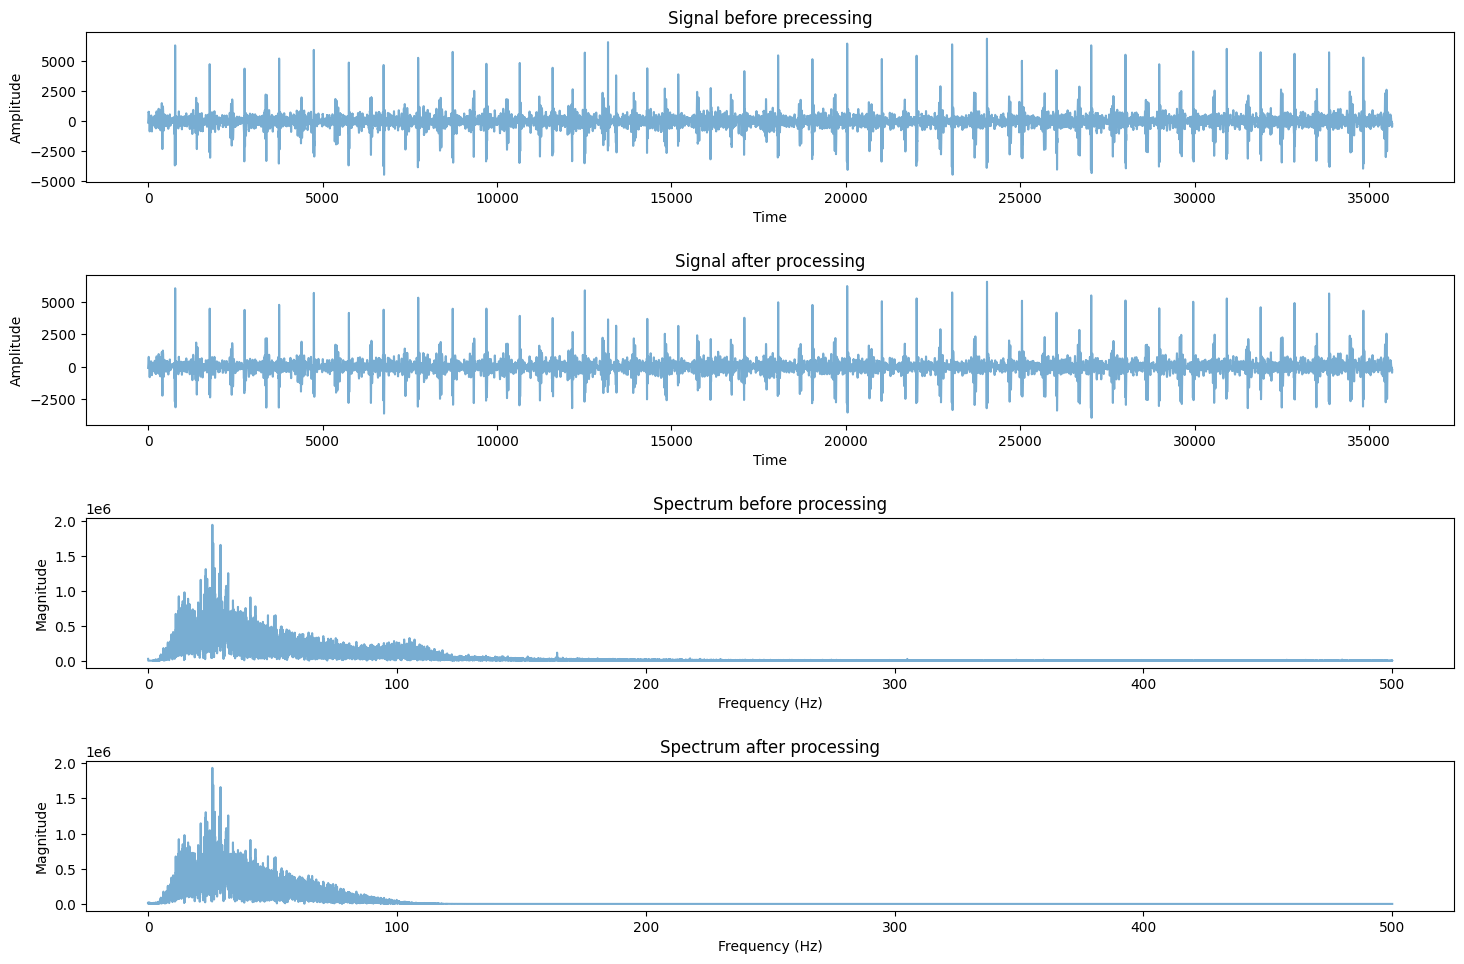

In [22]:
# Normal Signal:
NORMAL_SIGNAL_PREPROCESSING.process_emd_wl_dfilter(n_imf=c.N_IMF,
                                                   order=c.FILTER_ORDER,
                                                   low_fc=c.LOW_FC,
                                                   high_fc=c.HIGH_FC,
                                                   plot=True)

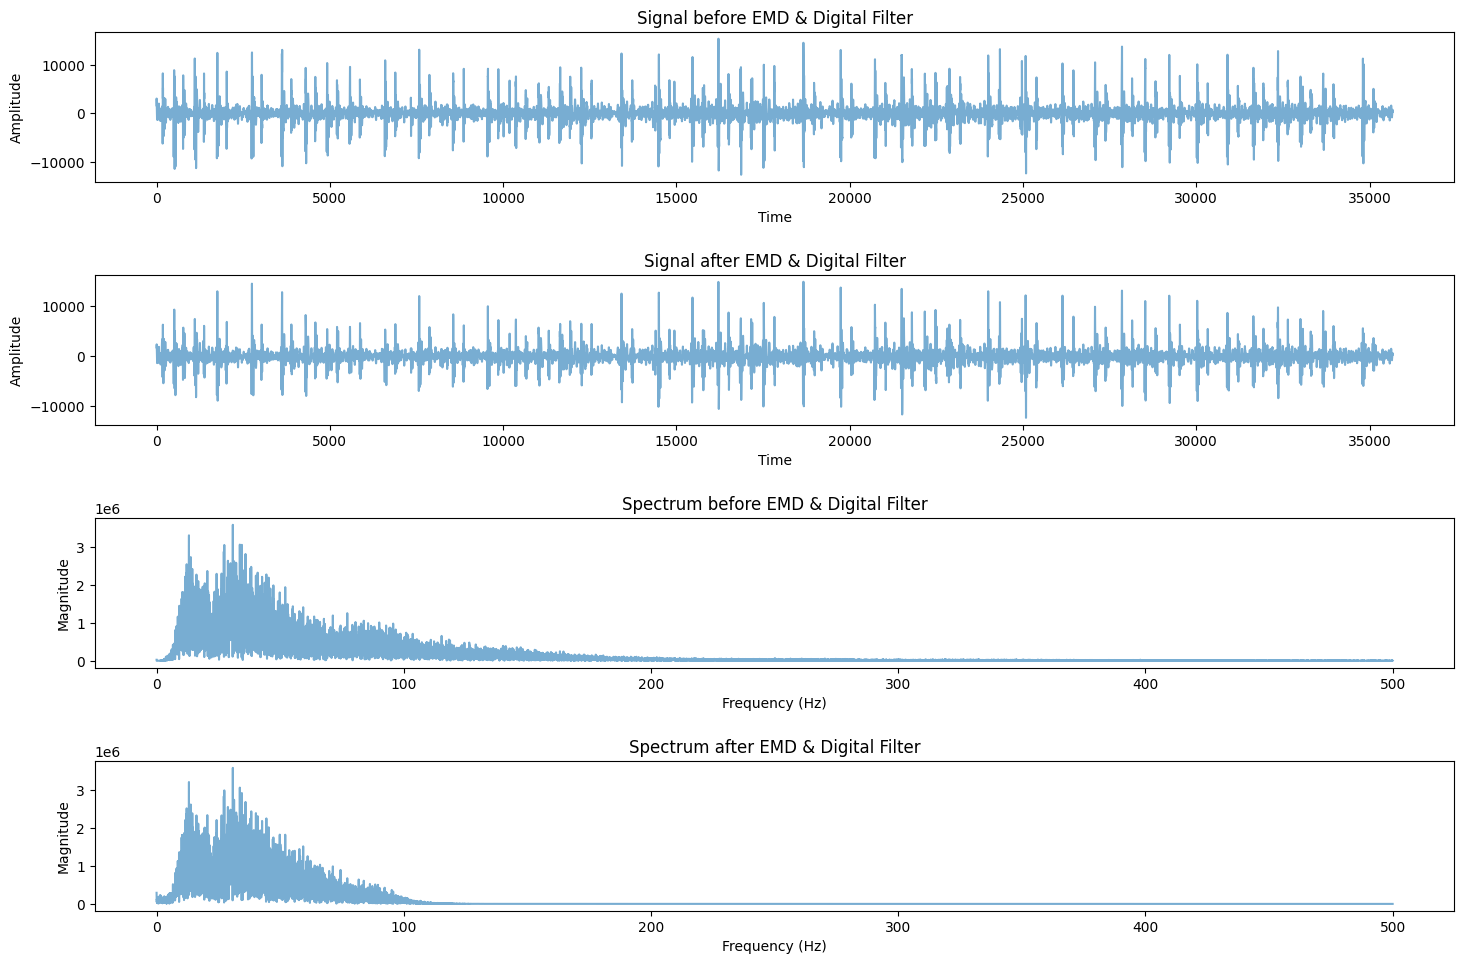

In [23]:
# Abnormal Signal:
ABNORMAL_SIGNAL_PREPROCESSING.process_emd_dfilter(n_imf=c.N_IMF,
                                                  order=c.FILTER_ORDER,
                                                  low_fc=c.LOW_FC,
                                                  high_fc=c.HIGH_FC,
                                                  plot=True)

## 3. Slicing:
### Introduction: 
- The dataset contains 3240 samples (Normal and Abnormal PCG signals) in an audio form (.wav) with a length between 5 to 35 seconds. 
- When applying a sampling rate of 1000 Hz, the signals length varies between (5000 to 35000 samples).
- Segmentation is used to slice the signals to a specific length, so that all signals are equal in length and therefore the number of samples per signals are equal.

### Objective:
The objective of this part is to increase the dataset by slicing all signals to 5000 samples with respect to its class.

### Notes:
- The code of the slice function is run in signal-preprocessing.py and the sliced_dataframes are saved in data directory.
- audio_index[0] is a normal PCG Signal.
- audio_index[51] is an abnormal PCG Signal.

In [24]:
SLICED_DENOISED_SIGNALS = pd.read_csv(f'{c.SIG_PRE_PATH}/denormalized/digital_filters/digital_filters_v1.csv')

In [25]:
SLICED_DENOISED_SIGNALS

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,class
0,93.586270,123.904689,157.531528,197.099657,243.565724,296.112214,352.629208,410.576393,467.885375,523.547387,...,-464.886910,-441.773691,-397.985198,-332.112829,-244.964011,-140.014356,-23.335167,97.099159,212.635161,1.0
1,315.428182,399.815095,463.192500,506.141734,531.754159,544.351375,547.987830,545.200397,536.397905,520.079620,...,-134.889884,-83.318309,-27.872313,26.290139,75.834700,119.173953,155.928138,186.218981,210.086065,1.0
2,227.205761,236.934605,238.561144,231.588033,215.897988,191.757512,159.723759,120.580478,75.403256,25.752983,...,238.223427,178.196682,124.054524,77.222167,36.431362,-1.456302,-40.030404,-81.849269,-127.425353,1.0
3,-175.018937,-221.278168,-262.463931,-295.807319,-320.523950,-338.147247,-352.081109,-366.524125,-385.102326,-409.617652,...,-281.815695,-254.987346,-214.497774,-162.402435,-104.098316,-45.821427,8.228029,57.877461,107.095175,1.0
4,161.944471,227.025230,301.828223,378.707653,443.765889,480.904360,477.959503,432.721872,356.235338,271.387049,...,-186.965401,-72.093163,63.103555,210.592652,349.166166,451.235168,492.630085,461.468479,362.737351,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12604,-231.601714,-149.062660,-55.843798,35.198259,116.943298,186.544670,242.642468,282.856371,302.838770,297.359802,...,120.196786,301.210386,376.777010,284.943362,16.759818,-367.310868,-744.451145,-961.882740,-887.055329,-1.0
12605,-460.065300,270.534915,1143.957982,1921.206546,2349.796773,2240.565185,1532.271286,322.365600,-1147.362801,-2547.161576,...,-2563.879330,-2532.677045,-2291.212361,-1822.267998,-1164.851425,-409.730651,322.109983,911.262027,1271.694349,-1.0
12606,1372.565798,1243.688936,963.855984,636.683759,362.098111,212.067681,216.864017,364.094781,608.610052,888.527353,...,-1915.652775,-3415.843352,-4075.826349,-3863.688894,-3016.443706,-1959.378442,-1159.181575,-961.350975,-1468.973690,-1.0
12607,-2505.998064,-3678.425503,-4512.067283,-4618.250678,-3829.072902,-2255.077677,-246.397190,1726.948227,3231.518976,4007.789230,...,-410.092717,-1984.883948,-3431.806009,-4583.899545,-5276.231961,-5373.672086,-4805.560093,-3598.148793,-1892.903530,-1.0


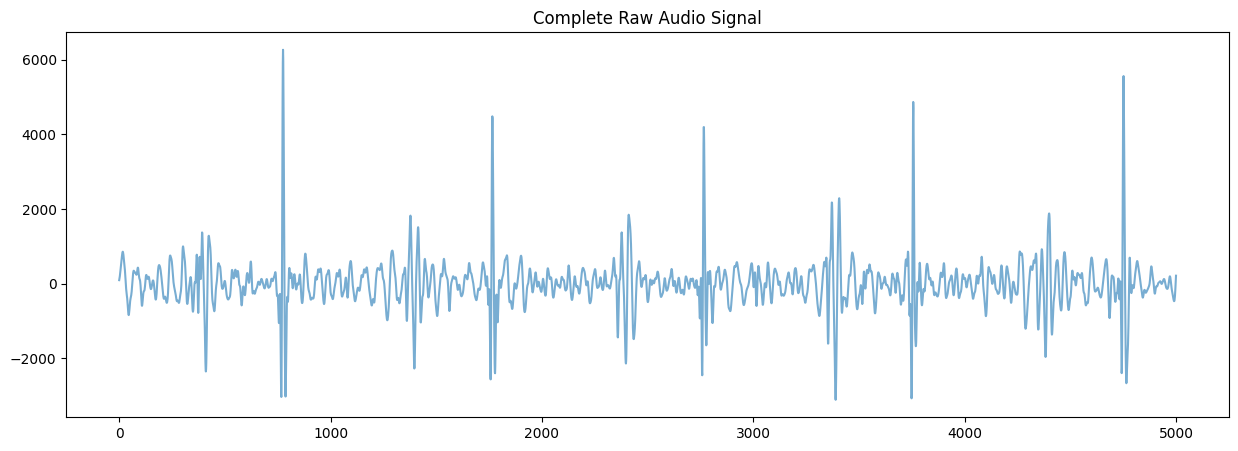

In [26]:
# Normal Signal:
SLICED_NORMAL_SIGNAL = helpers.SignalExploration(audio_signal=SLICED_DENOISED_SIGNALS.iloc[0,:-1], sr=c.SAMPLING_RATE)
SLICED_NORMAL_SIGNAL.plot_signal()

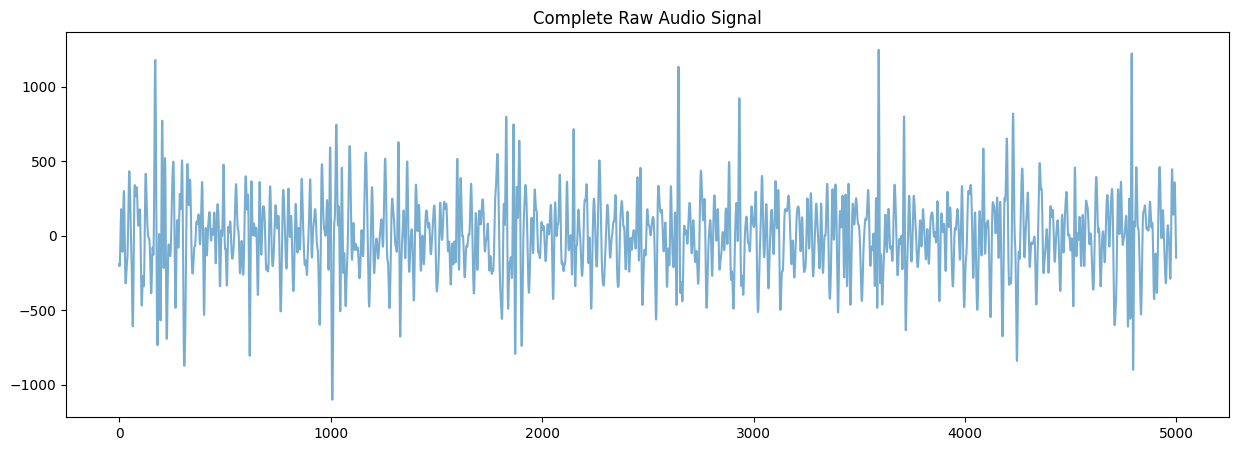

In [27]:
# Abnormal Signal:
SLICED_ABNORMAL_SIGNAL = helpers.SignalExploration(audio_signal=SLICED_DENOISED_SIGNALS.iloc[51,:-1], sr=c.SAMPLING_RATE)
SLICED_ABNORMAL_SIGNAL.plot_signal()